# KADOMS PROJECT

In [97]:
%matplotlib widget

from roboticstoolbox import DHRobot, RevoluteDH
from math import pi
import numpy as np
np.set_printoptions(linewidth=100, suppress=True)

# Define link properties
link_lengths = [0.25, 0.25, 0.25, 0.10, 0]
density = 2700  # alu density kg/m^3

g = 9.81

# Calculate size and mass of each link
link_sizes = [(l, l/10/2) for l in link_lengths]
link_masses = []
for size in link_sizes:
    volume = np.pi * (size[1] ** 2) * size[0]
    mass = density * volume
    link_masses.append(mass)

# Centre of mass - assume it's in the middle of each link for simplicity
link_centers = [l / 2 for l, _ in link_sizes]

qlim1 = np.deg2rad([-80, 80])
qlim2 = np.deg2rad([-90, 90])
qlim3 = np.deg2rad([-90, 90])
qlim4 = np.deg2rad([-90, 90])


# Define the robot links
links = [
    RevoluteDH(alpha=pi/2, d=link_lengths[0], qlim=qlim1, m=link_masses[0], r=[0, 0, link_centers[0]]),
    RevoluteDH(a=link_lengths[1], qlim=qlim2, m=link_masses[1], r=[0, 0, link_centers[1]]),
    RevoluteDH(a=link_lengths[2], qlim=qlim3, m=link_masses[2], r=[0, 0, link_centers[2]]),
    RevoluteDH(a=link_lengths[3], qlim=qlim4, m=link_masses[3], r=[0, 0, link_centers[3]]),
    #RevoluteDH(alpha=-pi/2)
]

# Create the robot
robot = DHRobot(links, gravity=[0, g, 0])



#loop through all links and print their r vectors
for i in range(0, len(robot.links)):
    print(robot.links[i].r)
    print(robot.links[i].m)


#print dh paremeters as numpy array
print(robot.links[0].A(0))




[0.    0.    0.125]
0.33133985018329853
[0.    0.    0.125]
0.33133985018329853
[0.    0.    0.125]
0.33133985018329853
[0.   0.   0.05]
0.021205750411731106
   1         0         0         0         
   0         0        -1         0         
   0         1         0         0.25      
   0         0         0         1         



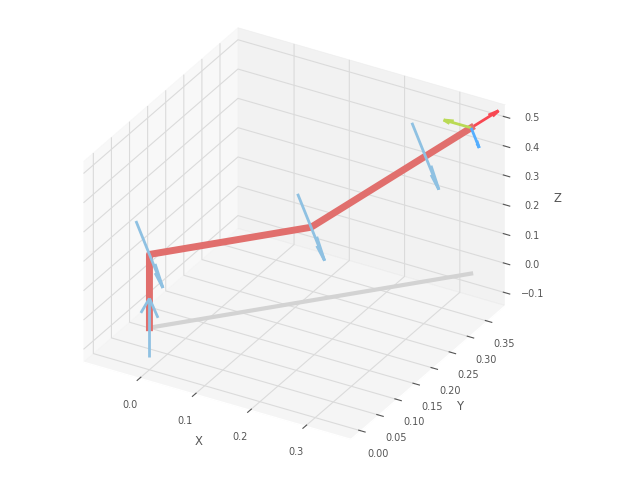

(-0.8, 0.8)

In [95]:
#%matplotlib inline
angles = [45, 0, 45, 0]

#convert deg to rad angles
angles = np.deg2rad(angles)

#import matplotlib
import matplotlib.pyplot as plt

robot.plot(angles)
plt.xlim(-0.8, 0.8)
plt.ylim(-0.8, 0.8)
#close the plot
#plt.close()


In [79]:
T = robot.fkine(angles)
print(T)


   0         0.7071    0.7071    0.25      
   0         0.7071   -0.7071    0.25      
  -1         0         0         0.15      
   0         0         0         1         



In [82]:
sol = robot.ikine_LM(T)    
print(sol) 
#just print solution
print(sol.q)

IKSolution: q=[0.7854, 0.7854, -1.571, -0.7854], success=True, iterations=6, searches=1, residual=2.42e-08
[ 0.78539816  0.78539817 -1.57079671 -0.78539778]


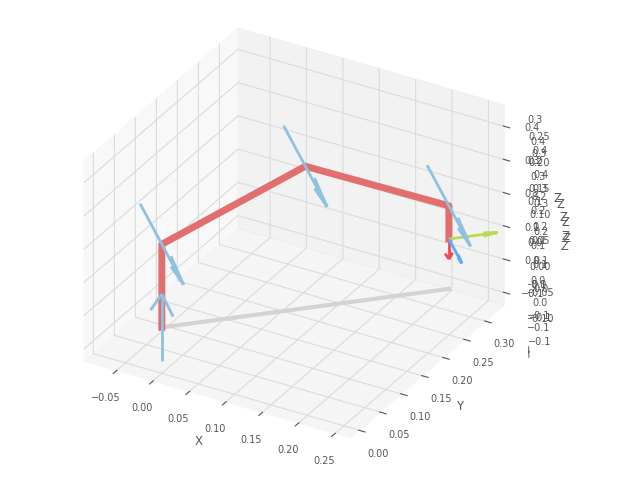

(-0.8, 0.8)

In [83]:

import matplotlib.pyplot as plt

robot.plot(sol.q)
plt.xlim(-0.8, 0.8)
plt.ylim(-0.8, 0.8)
#plt.close()

In [87]:
#set q1 to pi/4


for i, link in enumerate(robot.links):
    print(f"Transformation matrix for link {i}:")
    print(link.A(0))
    print()

from spatialmath import SE3

# Start with the identity transformation
T = SE3()

# Iterate over each link
for link in robot.links:
    # Multiply the current transformation by the transformation of the link at the zero angle position
    T = T * link.A(0)

print("Total transformation matrix:")
print(T)


Transformation matrix for link 0:
   1         0         0         0         
   0         0        -1         0         
   0         1         0         0.25      
   0         0         0         1         


Transformation matrix for link 1:
   1         0         0         0.25      
   0         1         0         0         
   0         0         1         0         
   0         0         0         1         


Transformation matrix for link 2:
   1         0         0         0.25      
   0         1         0         0         
   0         0         1         0         
   0         0         0         1         


Transformation matrix for link 3:
   1         0         0         0.1       
   0         1         0         0         
   0         0         1         0         
   0         0         0         1         


Total transformation matrix:
   1         0         0         0.6       
   0         0        -1         0         
   0         1         0         0.